In [1]:
# Add directory above current directory to path
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
import numpy as np
from src.density_matrix import DensityMatrix,SPARSE_TYPE
from src.ket import Ket,Basis,canonical_basis

A density matrix is a sparse matrix along with a basis

In [3]:
data = SPARSE_TYPE(np.identity(4))
basis =  Basis([Ket(0,2),Ket(1,2),Ket(2,2),Ket(3,2)])

In [4]:
DM_1 = DensityMatrix(data,basis)

In [5]:
DM_1.data

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>

In [6]:
DM_1.data.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [7]:
DM_1.basis

[0 1 2 3]

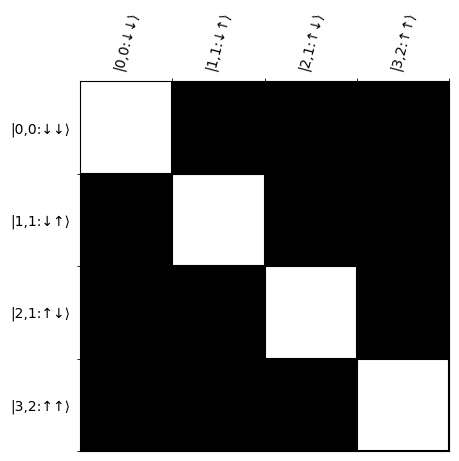

In [8]:
DM_1.plot()

We can combine these density matrices in a number of ways

In [9]:
r = np.random.random((4,4))
data = SPARSE_TYPE(r+r.T)
basis = Basis([Ket(0,2),Ket(1,2),Ket(2,2),Ket(2,2)])
DM_2 = DensityMatrix(data,basis)

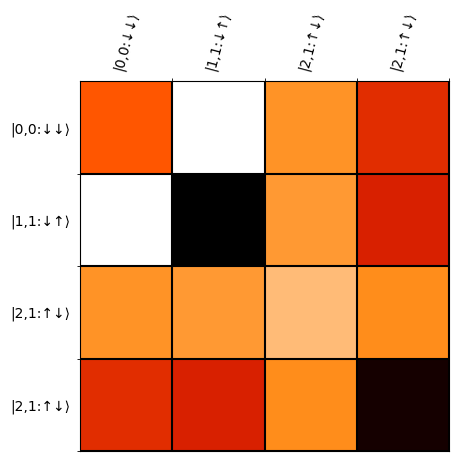

In [10]:
DM_2.plot()

In [11]:
DM_1+DM_2

AssertionError: 

Whoops! looks like i have a typo in my basis for the second matrix. Most operations between DMs require that they both have the same basis. This reduces the likelihood of doing a valid calcuation with no physical meaning.

In [12]:
data = SPARSE_TYPE(np.random.random((4,4)))
basis = Basis([Ket(0,2),Ket(1,2),Ket(2,2),Ket(3,2)])
DM_2 = DensityMatrix(data,basis)

In [13]:
from src.density_matrix import dm_exp,dm_log,dm_trace

In [14]:
DM_1+DM_2 #Addition
DM_1*3 # scalar multiplication
DM_2*DM_1 # matrix multiplication
DM_1**3 # matrix power
DM_1.H #hermitian conjugate
dm_exp(DM_1) #matrix exponentiation
dm_log(DM_1) #matrix log
dm_trace(DM_1) #matrix log

/Users/unnatiakhouri/Documents/GitHub/QuNet/QuNet_bootcamp_2025/../src/density_matrix.py:355: Warning: Requires conversion to and from dense
  warnings.warn("Requires conversion to and from dense", Warning)


np.float64(4.0)

We can also tensor two DMs. The resulting DM will have the tensored basis

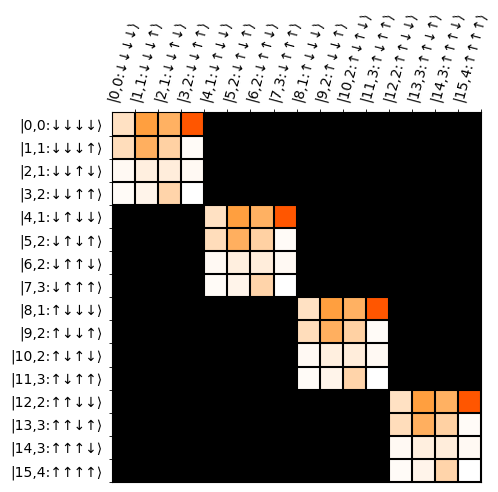

In [15]:
DM_tensored = DM_1.tensor(DM_2)
DM_tensored.plot()

we can also change the basis

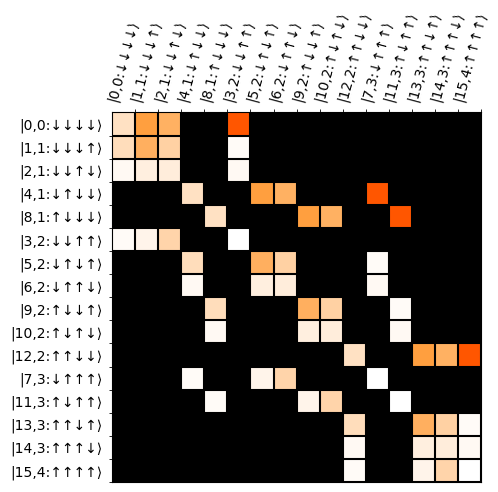

In [16]:
DM_tensored.change_to_energy_basis()
DM_tensored.plot()

We can also simply "relabel" the basis.  This is effectivly renaming the qbits. It ONLY effects the basis and not the matrix itself.

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
[0 2 1 3 4 6 5 7 8 10 9 11 12 14 13 15]


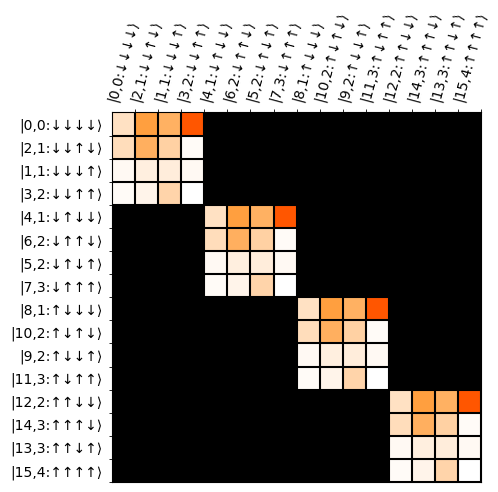

In [17]:
DM_tensored.change_to_canonical_basis()
print(DM_tensored.basis)
DM_tensored.relabel_basis([0,1,3,2])
print(DM_tensored.basis)
DM_tensored.plot()

becouse the basis is in a different order it is incompatible with the original matrix. 

In [18]:
from src.density_matrix import qbit,n_thermal_qbits

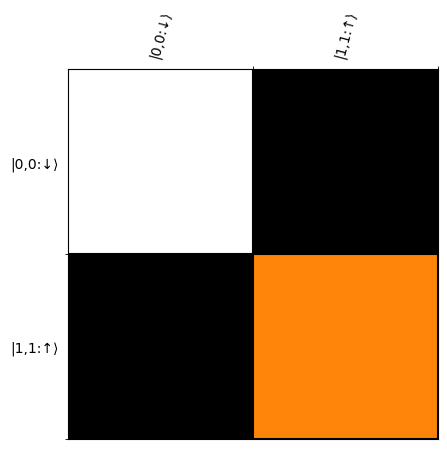

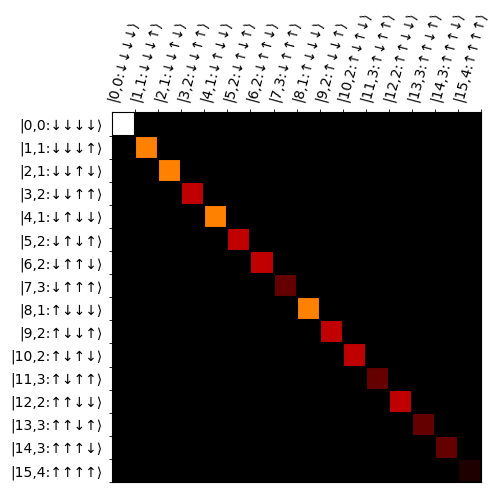

In [19]:
qbit(.1).plot()
n_thermal_qbits([.1,.1,.1,.1]).plot()

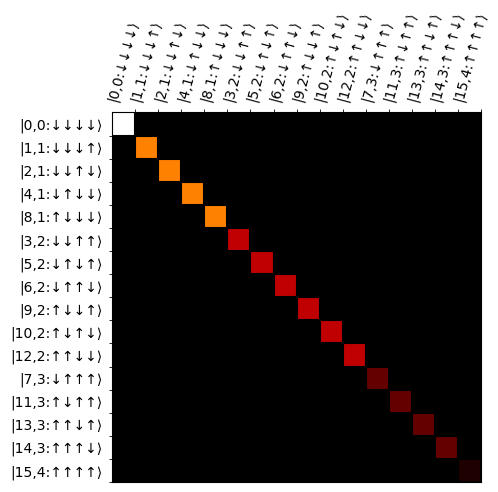

In [20]:
nq = n_thermal_qbits([.1,.1,.1,.1])
nq.change_to_energy_basis()
nq.plot()